# Introduction to Business Analytics - Challenge #

## Introduction

The challenge relates to the housing market in the Santiago de Chile area. A relevant dataset was provided and used to perform different analyses on. The challenge is split into three components: a prediction challenge, an exploratory component and the report notebooks. To address the different components of the challenge the final handin contains four notebooks that should be read in the following order:
1. Descriptive Statistics Notebook
2. Additional Dataset Notebook
3. Exploratory Notebook
4. Predictive Notebook

### The dataset
The dataset that was provided for the challenge contains a few details about different house transactions, such as the latitude/longitude coordinates, the transport accessibility context of the area and some characteristics of the household that bought the house.

The dataset was provided as an excel sheet that also contained a data dictionary that contained additional information about the columns provided in the dataset.

The first step was then to get a sense of the dataset provided and examine the information provided and read it into a dataframe so that further data analysis and machine learning models could be applied. The data was read into a dataframe called 'df' and the information from the data dictionary was read into the pandas dataframe 'headers'.

In [14]:
# Add the necessary libraries to use
import numpy as np
import pandas as pd

# Necessary commands for the graphs to show up in the notebook on the correct format
%matplotlib inline
import matplotlib.pyplot as plt

# matplotlib style options
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 8)

In [15]:
# We start by reading in the dataset from the Excel file
df = pd.read_excel('Households Data.xlsx', sheet_name = 'Hogares')
headers = pd.read_excel('Households Data.xlsx', sheet_name = 'Dictionary')

In [16]:
# View the first few lines in the dataframe to get familiar with its contents
df.head()

,Hogar,EXCLUIR,paraValidacion,Sector,DirCoordX,DirCoordY,MontoArr,IngresoHogar,Factor,AnosEstudio,...,Acc_Habitacion_tpte_pub,Acc_Industria_tpte_pub,Acc_Servicios_tpte_pub,Acc_Comercio_auto,Acc_Educacion_auto,Acc_Habitacion_auto,Acc_Industria_auto,Acc_Servicios_auto,CLUSTER7,CLUSTER2
0,100010,0,0,7,335180.8019,6266420.975,100000,450845,136.393738,11,...,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
1,100020,0,0,7,338410.2114,6265607.141,120000,1019369,73.843597,11,...,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
2,100030,0,0,7,327863.8248,6257800.086,70000,80000,180.722809,10,...,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
3,100041,0,0,7,327864.0000,6257800.000,80000,559259,150.379059,14,...,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
4,100052,0,0,7,338480.8152,6267296.941,117771,710309,122.001518,12,...,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1


In [17]:
# View the first few lines of the headers dataframe to get familiar with its contents.
headers.head()

,Variable,Description,Used in Model?
0,Hogar,ID of Household,NaN
1,EXCLUIR,Exclude from estimation,NaN
2,paraValidacion,sample for validation,NaN
3,Sector,Exogenous sector (7 sectors used for exogenous...,YES (Segmentation in Exogenous Zones Model)
4,DirCoordX,UTM coordinate X,NaN


The headers dataframe, that contains the data dictionary for the dataset, contains a column called 'Used in Model?' that indicates whether or not the variable was used in the model that the author of the dataset constructed. Since the task is to create a new model this information is irrelevant and therefore the column was deleted from the dataframe.

In [18]:
del headers['Used in Model?']

By looking at the contents of the data dictionary provided with the dataset, it can be seen which information is available from the dataset.

In [19]:
headers

,Variable,Description
0,Hogar,ID of Household
1,EXCLUIR,Exclude from estimation
2,paraValidacion,sample for validation
3,Sector,Exogenous sector (7 sectors used for exogenous...
4,DirCoordX,UTM coordinate X
5,DirCoordY,UTM coordinate Y
6,MontoArr,Monthly dwelling rent (Chilean Peso)
7,IngresoHogar,Household income (Chilean Peso)
8,Factor,Expansion factor of household in survey
9,AnosEstudio,Years of formal Education of head of household


As mentioned in the challenge statement the variables **DirCoordX** and **DirCoordY** are not in the traditinoal latitude/longitude coordinate format. This is also clear from the 'df.head()' statement above where the **DirCoordX** values are around 33X.XXX and **DirCoordY** is 62XX.XXX. The coordinates in to the dataframe are provided in Universal Transverse Mercator coordinates (UTM), but for the purpose of this report the coordinates were changed into latitude and longitude coordinates. In order to do the conversion it was necessary to include the information that Santiago de Chile is in the 19H UTM grid zone.

In [20]:
# We need to change the UTM coordinates into regular latlong-coordinates
# UTM grid zone for Santiago de Chile is 19H

from pyproj import Proj

myProj = Proj("+proj=utm +zone=19H, +south +ellps=WGS84 +datum=WGS84 +units=m +no_defs")

df['Longitude'], df['Latitude'] = myProj(df['DirCoordX'].values, df['DirCoordY'].values, inverse=True)

import utm
df['Latitude'], df['Longitude'] = utm.to_latlon(df['DirCoordX'].values, df['DirCoordY'].values, 19, northern=False)

# reference: https://ocefpaf.github.io/python4oceanographers/blog/2013/12/16/utm/

In [21]:
df.head()

,Hogar,EXCLUIR,paraValidacion,Sector,DirCoordX,DirCoordY,MontoArr,IngresoHogar,Factor,AnosEstudio,...,Acc_Servicios_tpte_pub,Acc_Comercio_auto,Acc_Educacion_auto,Acc_Habitacion_auto,Acc_Industria_auto,Acc_Servicios_auto,CLUSTER7,CLUSTER2,Longitude,Latitude
0,100010,0,0,7,335180.8019,-3733579.025,100000,450845,136.393738,11,...,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1,-70.779035,-33.729444
1,100020,0,0,7,338410.2114,-3734392.859,120000,1019369,73.843597,11,...,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1,-70.744340,-33.737278
2,100030,0,0,7,327863.8248,-3742199.914,70000,80000,180.722809,10,...,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1,-70.859656,-33.805994
3,100041,0,0,7,327864.0000,-3742200.000,80000,559259,150.379059,14,...,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1,-70.859654,-33.805995
4,100052,0,0,7,338480.8152,-3732703.059,117771,710309,122.001518,12,...,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1,-70.743270,-33.722055


The next step in exploring the provided dataset was to get familiar with the columns **EXCLUIR** and **paraValidacion**. But as could be seen in the data dictionary the columns contain:

| Variable | Explanation   |
|----------|---------------|
|   EXCLUIR  | Exclude from estimation|
|   paraValidacion  | sample for validation|

In order to explore both variables two new dataframes were created using filter conditions from these variables.

In [22]:
# Create a copy of the dataframe
data = df[:]

# Filter the new dataframe and then remove the columns used in the filtering
data = data[(data.EXCLUIR ==0)&(data.paraValidacion == 0)]
del data['EXCLUIR']
del data['paraValidacion']

# Create a new dataframe and filter it, then remove the columns used in the filtering
validation = df[df.paraValidacion == 1]
del validation['EXCLUIR']
del validation['paraValidacion']

In [23]:
validation.describe()

,Hogar,Sector,DirCoordX,DirCoordY,MontoArr,IngresoHogar,Factor,AnosEstudio,CLASE,Sup_Prom_Constr_Hab_EOD,...,Acc_Servicios_tpte_pub,Acc_Comercio_auto,Acc_Educacion_auto,Acc_Habitacion_auto,Acc_Industria_auto,Acc_Servicios_auto,CLUSTER7,CLUSTER2,Longitude,Latitude
count,1783.000000,1783.000000,1783.000000,1.783000e+03,1.783000e+03,1.783000e+03,1783.000000,1783.000000,1783.000000,1783.000000,...,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000
mean,192187.794167,3.833988,344297.904816,-3.707401e+06,1.894788e+05,7.003852e+05,113.765675,12.134605,1.833427,49.903141,...,2589.412573,5875.375463,3384.579602,58020.347891,5082.068901,6294.425956,3.916994,1.149748,-70.676118,-33.494762
std,53984.655580,1.959589,10083.060982,1.100471e+04,1.643701e+05,7.956532e+05,75.974882,3.545733,0.734560,22.400565,...,1801.800967,1601.231542,863.957392,14143.349246,1302.210178,1934.002188,1.516041,0.356924,0.109075,0.098839
min,100541.000000,1.000000,292775.529400,-3.739621e+06,1.000000e+04,9.430000e+02,6.647559,0.000000,1.000000,0.000000,...,56.474950,1048.440000,613.410000,10856.450000,1030.760000,1061.180000,1.000000,1.000000,-71.235482,-33.782358
25%,145590.500000,2.000000,338936.338650,-3.714971e+06,1.100000e+05,2.921740e+05,67.966682,10.000000,1.000000,39.800000,...,1103.975140,5029.380000,3047.000000,52882.840000,4487.615000,5050.180000,3.000000,1.000000,-70.732847,-33.563712
50%,193431.000000,4.000000,345700.781900,-3.706706e+06,1.500000e+05,5.000000e+05,93.474106,12.000000,2.000000,46.000000,...,2123.045970,6055.310000,3538.920000,61214.300000,5305.480000,6415.370000,5.000000,1.000000,-70.660767,-33.488926
75%,235981.000000,6.000000,351203.070600,-3.700687e+06,2.000000e+05,8.456250e+05,134.799980,14.000000,2.000000,56.300000,...,3676.456030,6973.390000,4029.430000,68584.750000,6006.600000,7694.030000,5.000000,1.000000,-70.601971,-33.434134
max,399911.000000,7.000000,362815.515900,-3.672183e+06,2.000000e+06,1.480000e+07,654.615540,24.000000,3.000000,157.200000,...,7713.396150,8583.060000,4670.060000,75774.780000,7260.030000,10000.680000,7.000000,2.000000,-70.474217,-33.177505


In [24]:
data.describe()

,Hogar,Sector,DirCoordX,DirCoordY,MontoArr,IngresoHogar,Factor,AnosEstudio,CLASE,Sup_Prom_Constr_Hab_EOD,...,Acc_Servicios_tpte_pub,Acc_Comercio_auto,Acc_Educacion_auto,Acc_Habitacion_auto,Acc_Industria_auto,Acc_Servicios_auto,CLUSTER7,CLUSTER2,Longitude,Latitude
count,16047.000000,16047.000000,16047.000000,1.604700e+04,1.604700e+04,1.604700e+04,16047.000000,16047.000000,16047.000000,16047.000000,...,16047.000000,16047.000000,16047.000000,16047.000000,16047.000000,16047.000000,16047.000000,16047.000000,16047.000000,16047.000000
mean,192774.951580,3.832554,344407.306079,-3.707656e+06,1.857825e+05,6.802118e+05,112.447722,12.142457,1.820091,49.592067,...,2538.833235,5877.834918,3389.507561,58137.027416,5083.841217,6289.656531,3.895183,1.142768,-70.674985,-33.497080
std,56074.907742,1.963570,10062.340315,1.072515e+04,1.574299e+05,6.992599e+05,74.066912,3.521345,0.728919,22.183789,...,1768.433417,1574.764151,848.262198,13898.485134,1287.796023,1910.353107,1.522356,0.349847,0.108851,0.096310
min,100010.000000,1.000000,290184.687200,-3.742745e+06,1.000000e+04,0.000000e+00,5.151379,0.000000,1.000000,0.000000,...,56.474950,1048.440000,613.410000,10856.450000,1030.760000,1061.180000,1.000000,1.000000,-71.262839,-33.810955
25%,144855.000000,2.000000,339191.590850,-3.715131e+06,1.107465e+05,3.000000e+05,68.410446,10.000000,1.000000,38.900000,...,1105.525140,5081.660000,3058.770000,53163.070000,4512.550000,5091.160000,2.000000,1.000000,-70.730102,-33.564891
50%,192271.000000,4.000000,345777.638300,-3.707021e+06,1.500000e+05,5.042610e+05,94.804199,12.000000,2.000000,45.400000,...,2048.700030,6085.000000,3522.550000,61213.100000,5277.600000,6432.510000,5.000000,1.000000,-70.659524,-33.491020
75%,237490.500000,6.000000,351460.314550,-3.700548e+06,2.000000e+05,8.358965e+05,133.587433,14.000000,2.000000,56.400000,...,3551.267210,6961.840000,3989.490000,68308.680000,6006.600000,7683.200000,5.000000,1.000000,-70.599231,-33.433053
max,743823.000000,7.000000,363829.847200,-3.672198e+06,5.000000e+06,1.300000e+07,927.142761,24.000000,3.000000,207.300000,...,7713.396150,8583.060000,4681.260000,75774.780000,7260.030000,10000.680000,7.000000,2.000000,-70.463316,-33.177605


In [25]:
print('Data:',len(data))
print('Validation:', len(validation))
print('Data+validation:',len(data)+len(validation))
print('Whole dataset:', len(df))

Data: 16047
Validation: 1783
Data+validation: 17830
Whole dataset: 18264


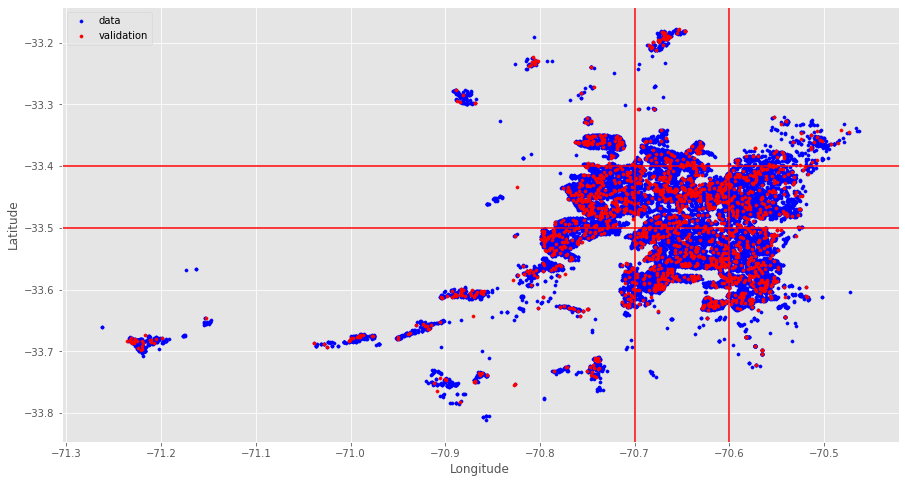

In [26]:
# Lets plot both of the datasets toghether with the Latitude and Longitude coordinates provided in
# challenge description
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(data.Longitude, data.Latitude, s=10, c='b', label='data')
ax1.scatter(validation.Longitude, validation.Latitude, s=10, c='r', label='validation')
plt.axhline(y=-33.4, color='r', linestyle='-')
plt.axhline(y=-33.5, color='r', linestyle='-')
plt.axvline(x=-70.6, color='r', linestyle='-')
plt.axvline(x=-70.7, color='r', linestyle='-')
plt.ylabel('Latitude')
plt.xlabel('Longitude')

plt.legend(loc='upper left');
plt.show()

It seems like the validation dataset (**paraValidacion** == 1) is a subset of the data, as the descriptive summaries of both datasets are similar and in the chart above the values are similar. 

The rows with **EXCLUIR** == 1 and **paraValidacion** == 0 are faulty datapoints of people who have not answered the survey, and those should be excluded from the dataset. So in our analysis we can use all other datapoints except for (**EXCLUIR** == 1 & **paraValidacion** == 0).

In [27]:
data_full = data.append(validation)
len(data_full)

17830

### The training and test sets
As indicated in the challenge prescription the models should be tested on a test set that is defined by the bounding box with coordinates 70.7E, 33.4S to 70.6E, 33.5S. The training set will then be defined by all other available data points. The dataset was split into two new dataframes called *test* and *train*. Then the lengths of the datasets were explored, to be able to see which percentage split this corresponds to.

In [28]:
test = data_full[(data_full.Longitude <= -70.6) &(data_full.Longitude >= -70.7) &(data_full.Latitude <= -33.4) & (data_full.Latitude >= -33.5)]
train = data_full[(data_full.Longitude > -70.6)|(data_full.Longitude < -70.7)|(data_full.Latitude > -33.4) | (data_full.Latitude < -33.5)]

In [29]:
print('Test data length:', len(test))
print('Train data length:',len(train))
print('Sum:', len(test)+len(train))
print('Test % of whole dataset:', len(test)/(len(test)+len(train)))

Test data length: 2929
Train data length: 14901
Sum: 17830
Test % of whole dataset: 0.16427369601794728


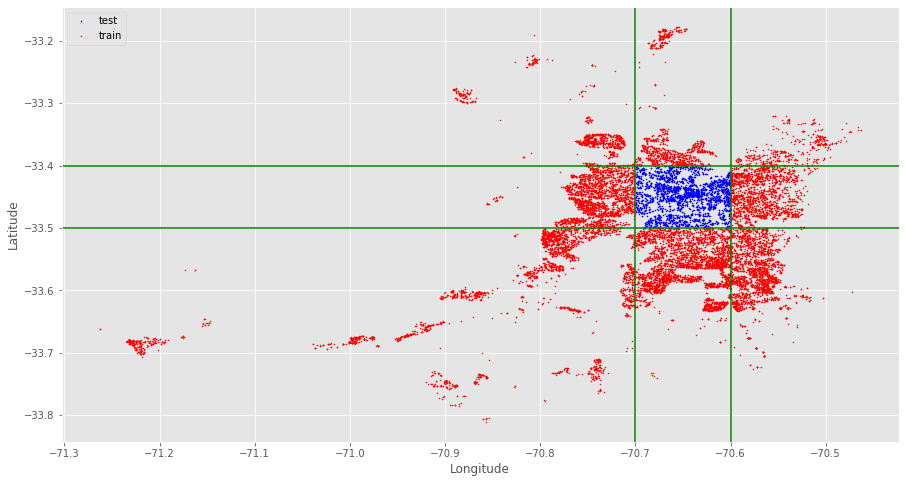

In [30]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(test.Longitude, test.Latitude, s=1, c='b', label='test')
ax1.scatter(train.Longitude, train.Latitude, s=1, c='r', label='train')
plt.axhline(y=-33.4, color='g', linestyle='-')
plt.axhline(y=-33.5, color='g', linestyle='-')
plt.axvline(x=-70.6, color='g', linestyle='-')
plt.axvline(x=-70.7, color='g', linestyle='-')
plt.ylabel('Latitude')
plt.xlabel('Longitude')

plt.legend(loc='upper left');
plt.show()

### The dataset variables

After gaining an understanding of the meaning of the **EXCLUIR** and **paraValidacion** columns and creating the test and training sets, the next step will be to gain a better understanding of the rest of the variables in the dataset.

In [31]:
headers

,Variable,Description
0,Hogar,ID of Household
1,EXCLUIR,Exclude from estimation
2,paraValidacion,sample for validation
3,Sector,Exogenous sector (7 sectors used for exogenous...
4,DirCoordX,UTM coordinate X
5,DirCoordY,UTM coordinate Y
6,MontoArr,Monthly dwelling rent (Chilean Peso)
7,IngresoHogar,Household income (Chilean Peso)
8,Factor,Expansion factor of household in survey
9,AnosEstudio,Years of formal Education of head of household


After examining the dataset the variables can be categorized as follows:

##### Variables that can and should be excluded from the model
- __Hogar:__ Household ID, doesn't give us any additional information for modelling and can't be used in future. Will only be used when merging different dataframes that both contain the same Household ID information. 
- __EXCLUIR:__ Was used in the original model to exclude data due to some kind of inconsistency. The dataset above has already used the information from this model so it will not provide any additional usage.
- __ParaValidacion:__ Was used in the original model to indicate the validation set. 
- __DirCoordX and DirCoordY:__ Location of property in UTM coordinates (X/Y). Needs to be transformed into geographic coordinates (longitude/latitude) to be used by our models.
- __Factor:__ In our survey data the expansion factor represents the weight of this kind of household in the population, i.e. how many people it represents. Could be helpful in analysing the results, but this information  
- __AnosEstudio:__ Years of formal education of head of household. This information is already included in the CLASE variable which we will predict
- __IngresoHogar:__ Household income (Chilean Peso). This has to be excluded from the prediction part of the challenge since this contains information about the household characteristics which directly relates to the household type that is the predicition variable of the models.

##### Continuous variables
- __MontoArr:__ Monthly dwelling rent (Chilean Peso)
- __Sup_Prom_Constr_Hab_EOD:__ Average Built surface of residential units in zone
- __Calid_EOD_norm_inv:__ Average Construction Quality of residential units in zone
- __DensConstr_EOD:__ Built density in zone (built surface divided by zone surface)
- __Dist_est_Metro_MC_KM:__ Distance to nearest subway station (km)
- __Dist_salida_Autop_MC_KM:__ Distance to nearest highway exit (km)
- __Tiempo_Com_Stgo:__ Travel time to CBD (min)
- __Ingreso_Promedio_Zona_MM:__ Average zonal income (Million Chilean Peso)
- __Acc_Comercio_tpte_pub:__ Accesibility to Commerce in transit
- __Acc_Educacion_tpte_pub:__ Accesibility to Education in transit
- __Acc_Habitacion_tpte_pub:__ Accesibility to habitational in transit
- __Acc_Industria_tpte_pub:__ Accesibility to Industry in transit
- __Acc_Servicios_tpte_pub:__ Accesibility to Services in transit
- __Acc_Comercio_auto:__ Accesibility to Commerce in car
- __Acc_Educacion_auto:__ Accesibility to Education in car
- __Acc_Habitacion_auto:__ Accesibility to habitational in car
- __Acc_Industria_auto:__ Accesibility to Industry in car
- __Acc_Servicios_auto:__ Accesibility to Services in car

##### Categorical variables
- __CLUSTER7:__ Was used in the author's clustering models, with 7 clusters.
- __CLUSTER2:__ Was used in the author's clustering model, with 2 clusters
- __Sector:__ An agrupation of zones, there are 7 sectors (east, north, etc).

Some of the variables above reference zones. The zones where provided in additional shapefiles that can be plotted and indicate the different zones that the Santiago de Chile area is divided up into.

<Figure size 1080x1080 with 0 Axes>

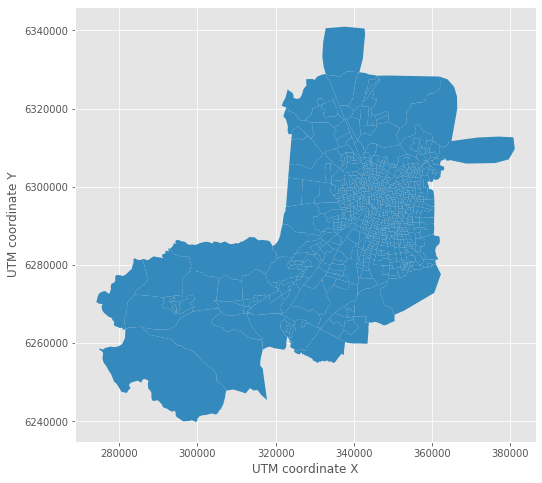

In [32]:
#let's check the shape file to understand the zones: 
import geopandas as gpd
zones = gpd.read_file('zone_shapefiles/ZonasEOD2012.shp')
fig = plt.figure(figsize = (15,15))
zones.plot()
plt.ylabel('UTM coordinate Y')
plt.xlabel('UTM coordinate X')
plt.show()

Now we start exploring the different variables provided in the dataset in more detail.
We start by visualizing the different sectors that are available in the dataset. The different colors correspond to the different sectors. From the above plot is is very clear that Sector 4 is completely contained within the testset, along with small parts of sectors 1, 2, 3, 5, 6. Sector 7 is completely absent from the testset. It's good to keep this in mind when we start with the prediction challenge.

<Figure size 1080x1080 with 0 Axes>

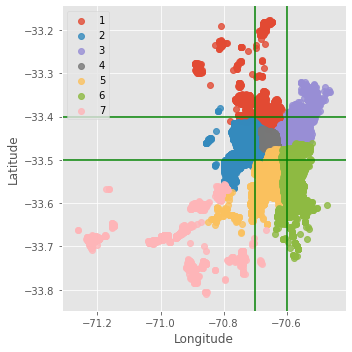

In [33]:
#let's examine the sectors
import seaborn as sns

plt.figure(figsize = (15,15))
sns.lmplot( x="Longitude", y="Latitude", data=data_full, fit_reg=False, hue='Sector', legend=False)

# Move the legend to an empty part of the plot
plt.legend(loc='upper left')

#define area for test set
plt.axhline(y=-33.4, color='g', linestyle='-')
plt.axhline(y=-33.5, color='g', linestyle='-')
plt.axvline(x=-70.6, color='g', linestyle='-')
plt.axvline(x=-70.7, color='g', linestyle='-')
plt.show()

Next we examine the accessibility columns. We plot the different variables with a test/train division in order to show how well the training set represents the test set.  

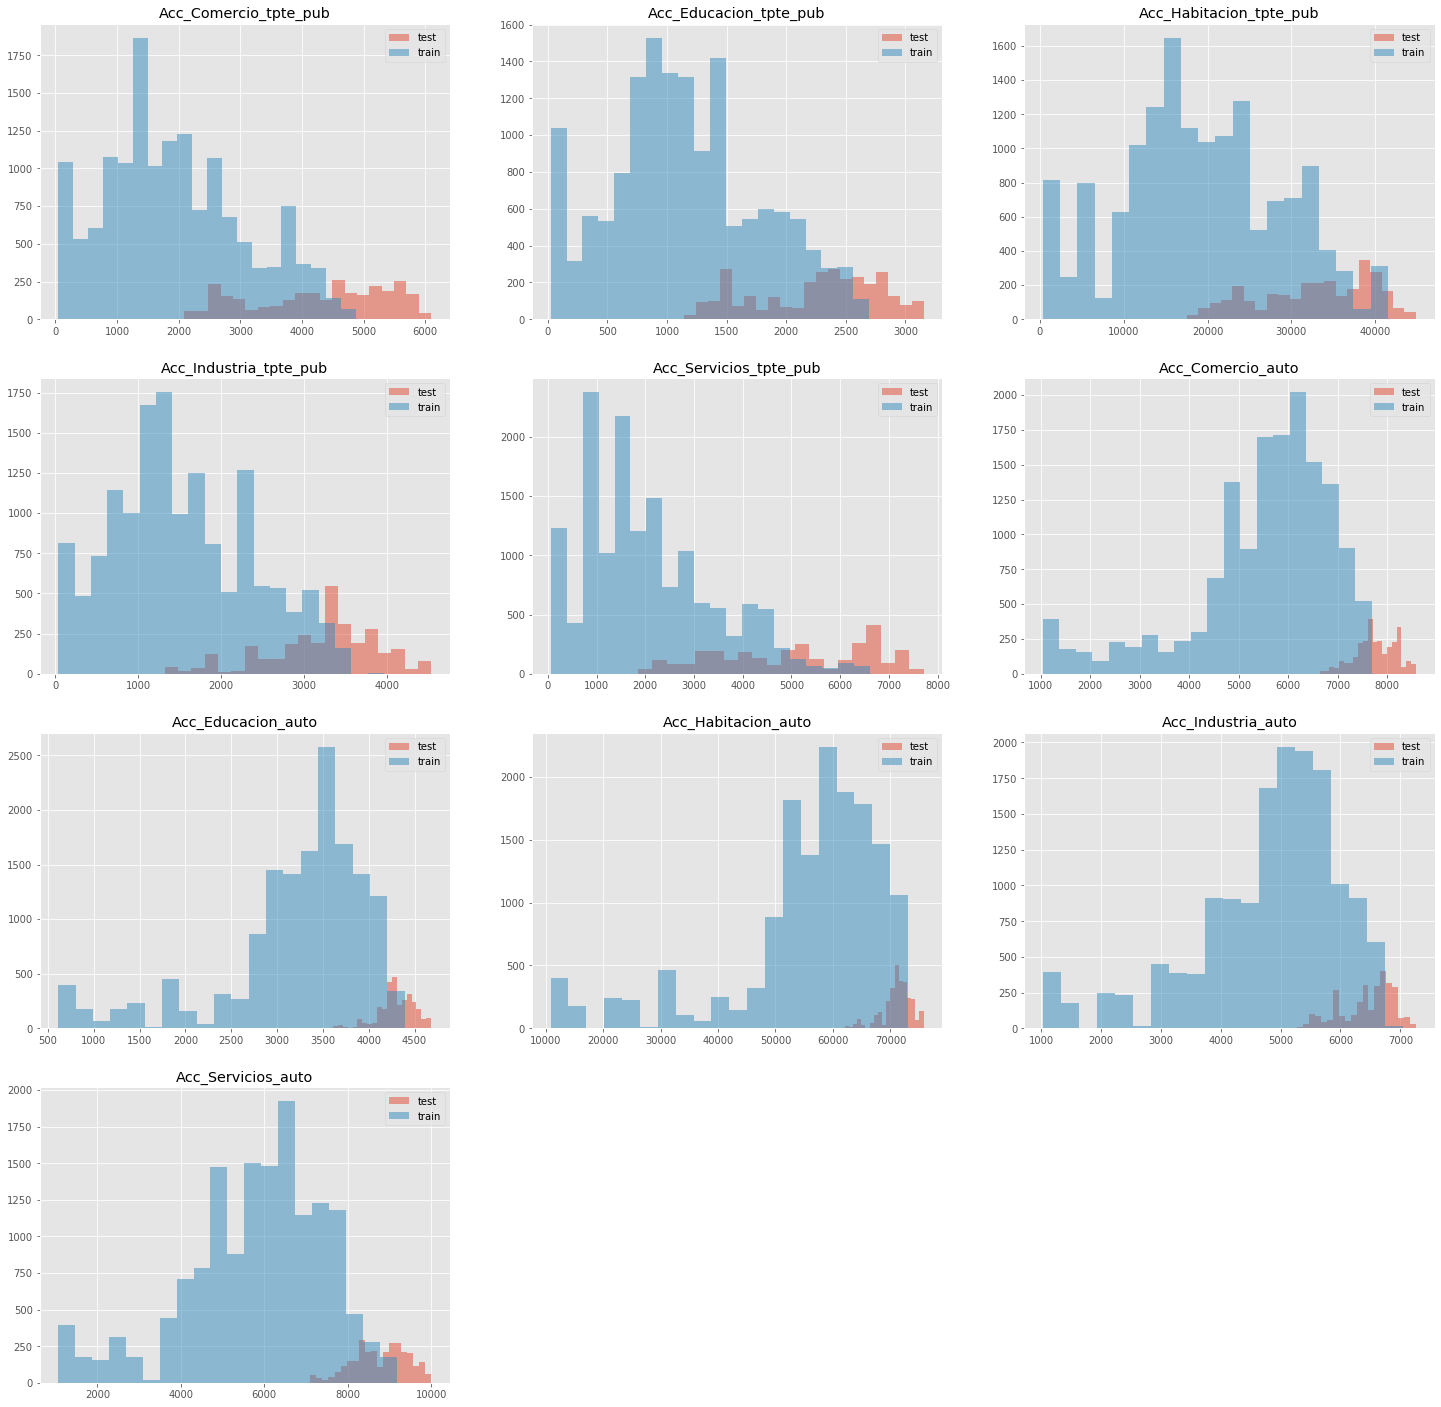

In [35]:
# let's examine the accessibility columns
acc_cols = ['Acc_Comercio_tpte_pub','Acc_Educacion_tpte_pub', 'Acc_Habitacion_tpte_pub',
            'Acc_Industria_tpte_pub','Acc_Servicios_tpte_pub',
            'Acc_Comercio_auto','Acc_Educacion_auto','Acc_Habitacion_auto',
            'Acc_Industria_auto', 'Acc_Servicios_auto']

# Good tips used for reference: https://machinelearningmastery.com/quick-and-dirty-data-analysis-with-pandas/

# PLOT HISTOGRAMS WITHOUT TEST/TRAIN DIVISION
# fig = plt.figure(figsize = (15,20))
# ax = fig.gca()
# data_full[acc_cols].hist(ax = ax, bins = 20)
# plt.show()

# PLOT HISTOGRAMS WITH TEST/TRAIN DIVISION
kwargs = dict(alpha=0.5, bins=20)
fig = plt.figure(figsize = (25,25))

for i in range(len(acc_cols)):
    plt.subplot(4,3,i+1)
    col = acc_cols[i]
    plt.hist(test[col], **kwargs, label='test')
    plt.hist(train[col], **kwargs, label='train')
    plt.title(acc_cols[i])
    plt.legend()    

plt.show()

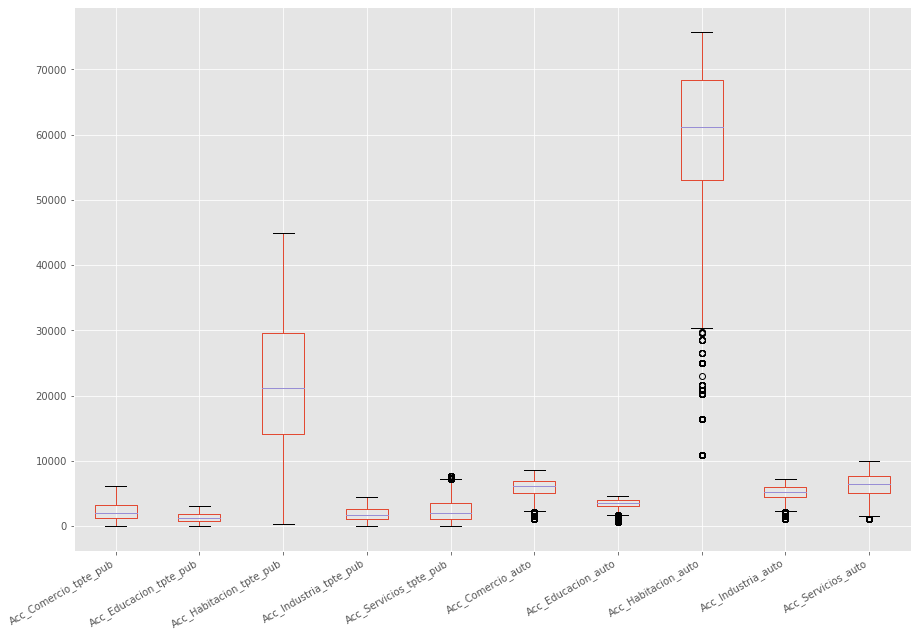

In [36]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
data_full[acc_cols].boxplot(ax=ax)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

# How to rotate the tick labels so that all of them are clearly visible
# Reference: https://stackoverflow.com/questions/26700598/matplotlib-showing-x-tick-labels-overlapping-despite-best-efforts

The accessibility variables in the dataset measure how good the transport (transit or auto in this case) is to those types of places. Here it seems that a higher number means better accessibility. If we assume that in the city center (i.e. in our test set) the accessibility is better than for our training set the accessibility values seem to be higher, so a bigger value would mean better accessibility. We can clearly see that the variables **Acc_Habitacion_tpte_pub** (Accesibility to habitational in transit) and **Acc_Habitacion_auto** (Accesibility to habitational in car) have a different scale and a lot bigger variance than the other variables.

It is clear that before some model are applied it is necessary to normalize/standardize the accessibility variables. However, we can clearly see that our training set doesn't represent our test set very well in the case of the accessibility variables, as the red areas of the histograms seem do have a different distribution in most instances.

Let's examine similar histograms for our zone columns. We should check if the zones are differnt in our test and training set, or if they have similar characteristics.

In [37]:
#let's have a look at the columns for zone information
zone_cols = ['Sup_Prom_Constr_Hab_EOD', 'Calid_EOD_norm_inv', 'DensConstr_EOD', 'Ingreso_Promedio_Zona_MM']

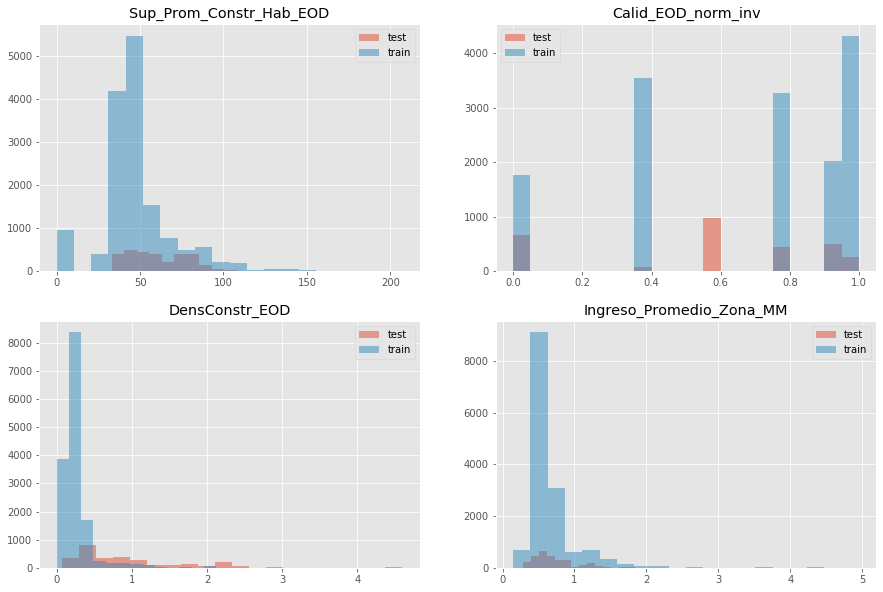

In [38]:
kwargs = dict(alpha=0.5, bins=20)
fig = plt.figure(figsize = (15,10))

for i in range(len(zone_cols)):
    plt.subplot(2,2,i+1)
    col = zone_cols[i]
    plt.hist(test[col], **kwargs, label='test')
    plt.hist(train[col], **kwargs, label='train')
    plt.title(zone_cols[i])
    plt.legend()    

plt.show()

For the variable **Sup_Prom_Constr_Hab_EOD** (Average Built surface of residential units in zone), our test set seems to be represented quite well by the training set. However, there is not as much overlap of the test and training sets in the case of the other two variables.

The distributions of these variables do not follow a normal distribution. This might need to be kept in mind in future modelling as well.

Next we examine the the distance columns using the same way as before.

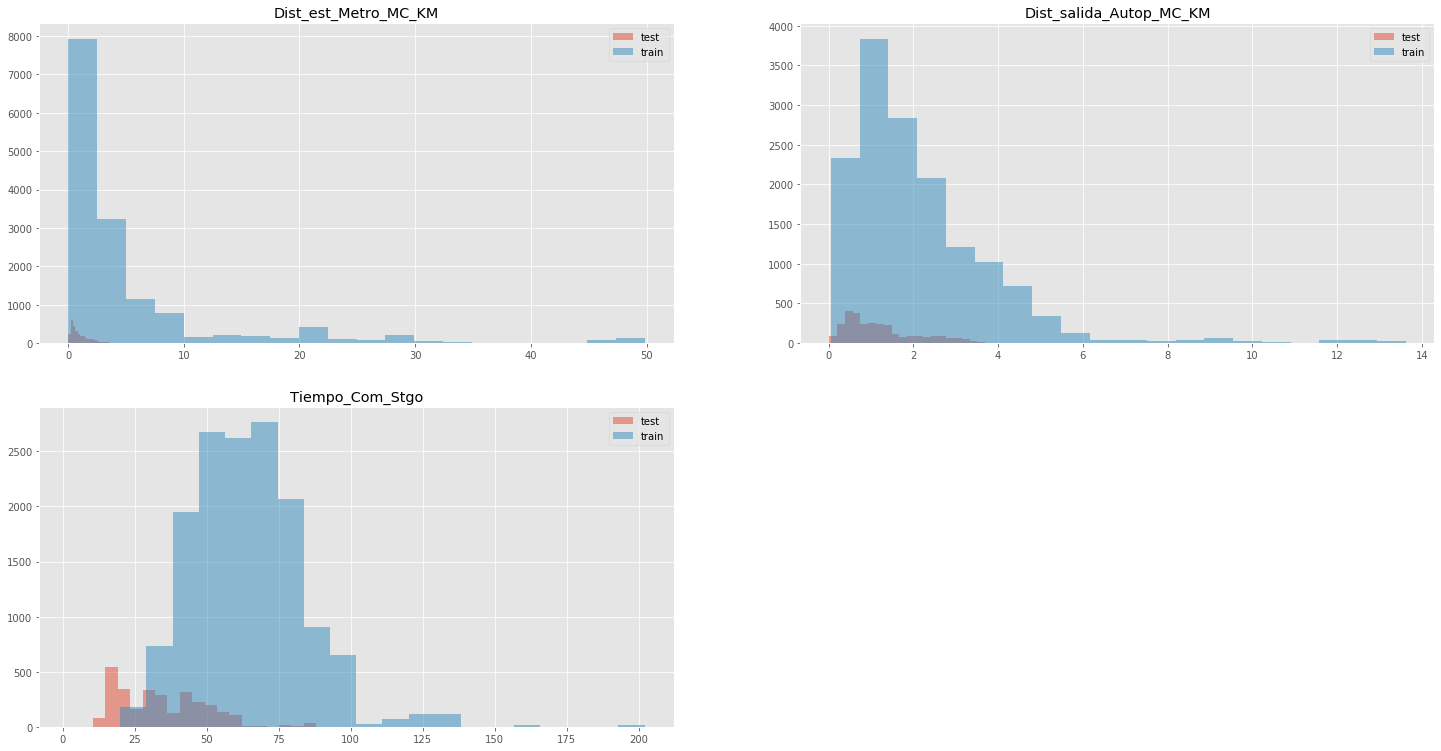

In [39]:
dist_cols = ['Dist_est_Metro_MC_KM','Dist_salida_Autop_MC_KM','Tiempo_Com_Stgo']

#PLOT HISTOGRAMS WITH TEST/TRAIN DIVISION
kwargs = dict(alpha=0.5, bins=20)
fig = plt.figure(figsize = (25,20))

for i in range(len(dist_cols)):
    plt.subplot(3,2,i+1)
    col = dist_cols[i]
    plt.hist(test[col], **kwargs, label='test')
    plt.hist(train[col], **kwargs, label='train')
    plt.title(dist_cols[i])
    plt.legend()    

plt.show()

The first two variables **Dist_est_Metro_MC_KM** and **Dist_salida_Autop_MC_KM** don't seem to be normally distributed but the test set seems to be represented well by the training set, since the two have a similar distribution. The **Tiempo_Com_Stgo** seems to be more normally distributed than the other variables, but the test set is not represented as well by the training set.

Finally we look at the histograms of the rest of the attributes that are left, **MontoArr** and **IngresoHogar**.

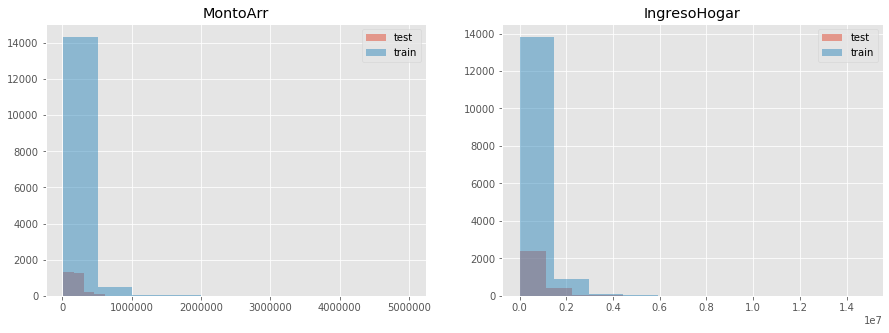

In [40]:
#other_cols = ['MontoArr', 'IngresoHogar','Dist_est_Metro_MC_KM','Dist_salida_Autop_MC_KM','Tiempo_Com_Stgo']
other_cols = ['MontoArr','IngresoHogar']

#PLOT HISTOGRAMS WITH TEST/TRAIN DIVISION
fig = plt.figure(figsize = (15,5))

for i in range(len(other_cols)):
    plt.subplot(1,2,i+1)
    col = other_cols[i]
    plt.hist(test[col], alpha = 0.5, label='test')
    plt.hist(train[col], alpha = 0.5, label='train')
    plt.title(other_cols[i])
    plt.legend()    
plt.show()

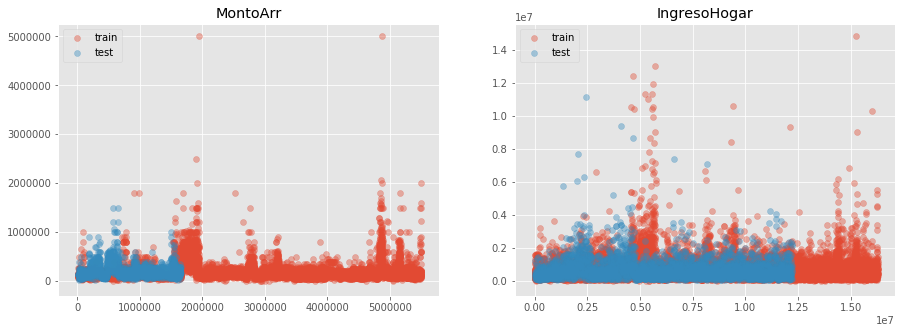

In [41]:
fig = plt.figure(figsize = (15,5))

for i in range(len(other_cols)):
    plt.subplot(1,2,i+1)
    col = other_cols[i]
    x = np.linspace(test[col].min(), test[col].max()*1.1, len(test[col]))
    x2 = np.linspace(train[col].min(), train[col].max()*1.1, len(train[col]))
    
    plt.scatter(x2, train[col], alpha = 0.4, label='train')
    plt.scatter(x, test[col], alpha = 0.4, label='test')
    plt.title(other_cols[i])
    plt.legend()    

plt.show()

Again the variables don't seem to be normally distributed but there seem to be a few outliers in **MontoArr** (monthly dwelling rent), which should probably be cleaned out before the data is used to make predictions.

### Detecting Outliers
As part of the data preperation and cleaning, boxplots where plotted of the attributes to see if any clear outliers would be visible that would need to be removed before the modelling takes place.

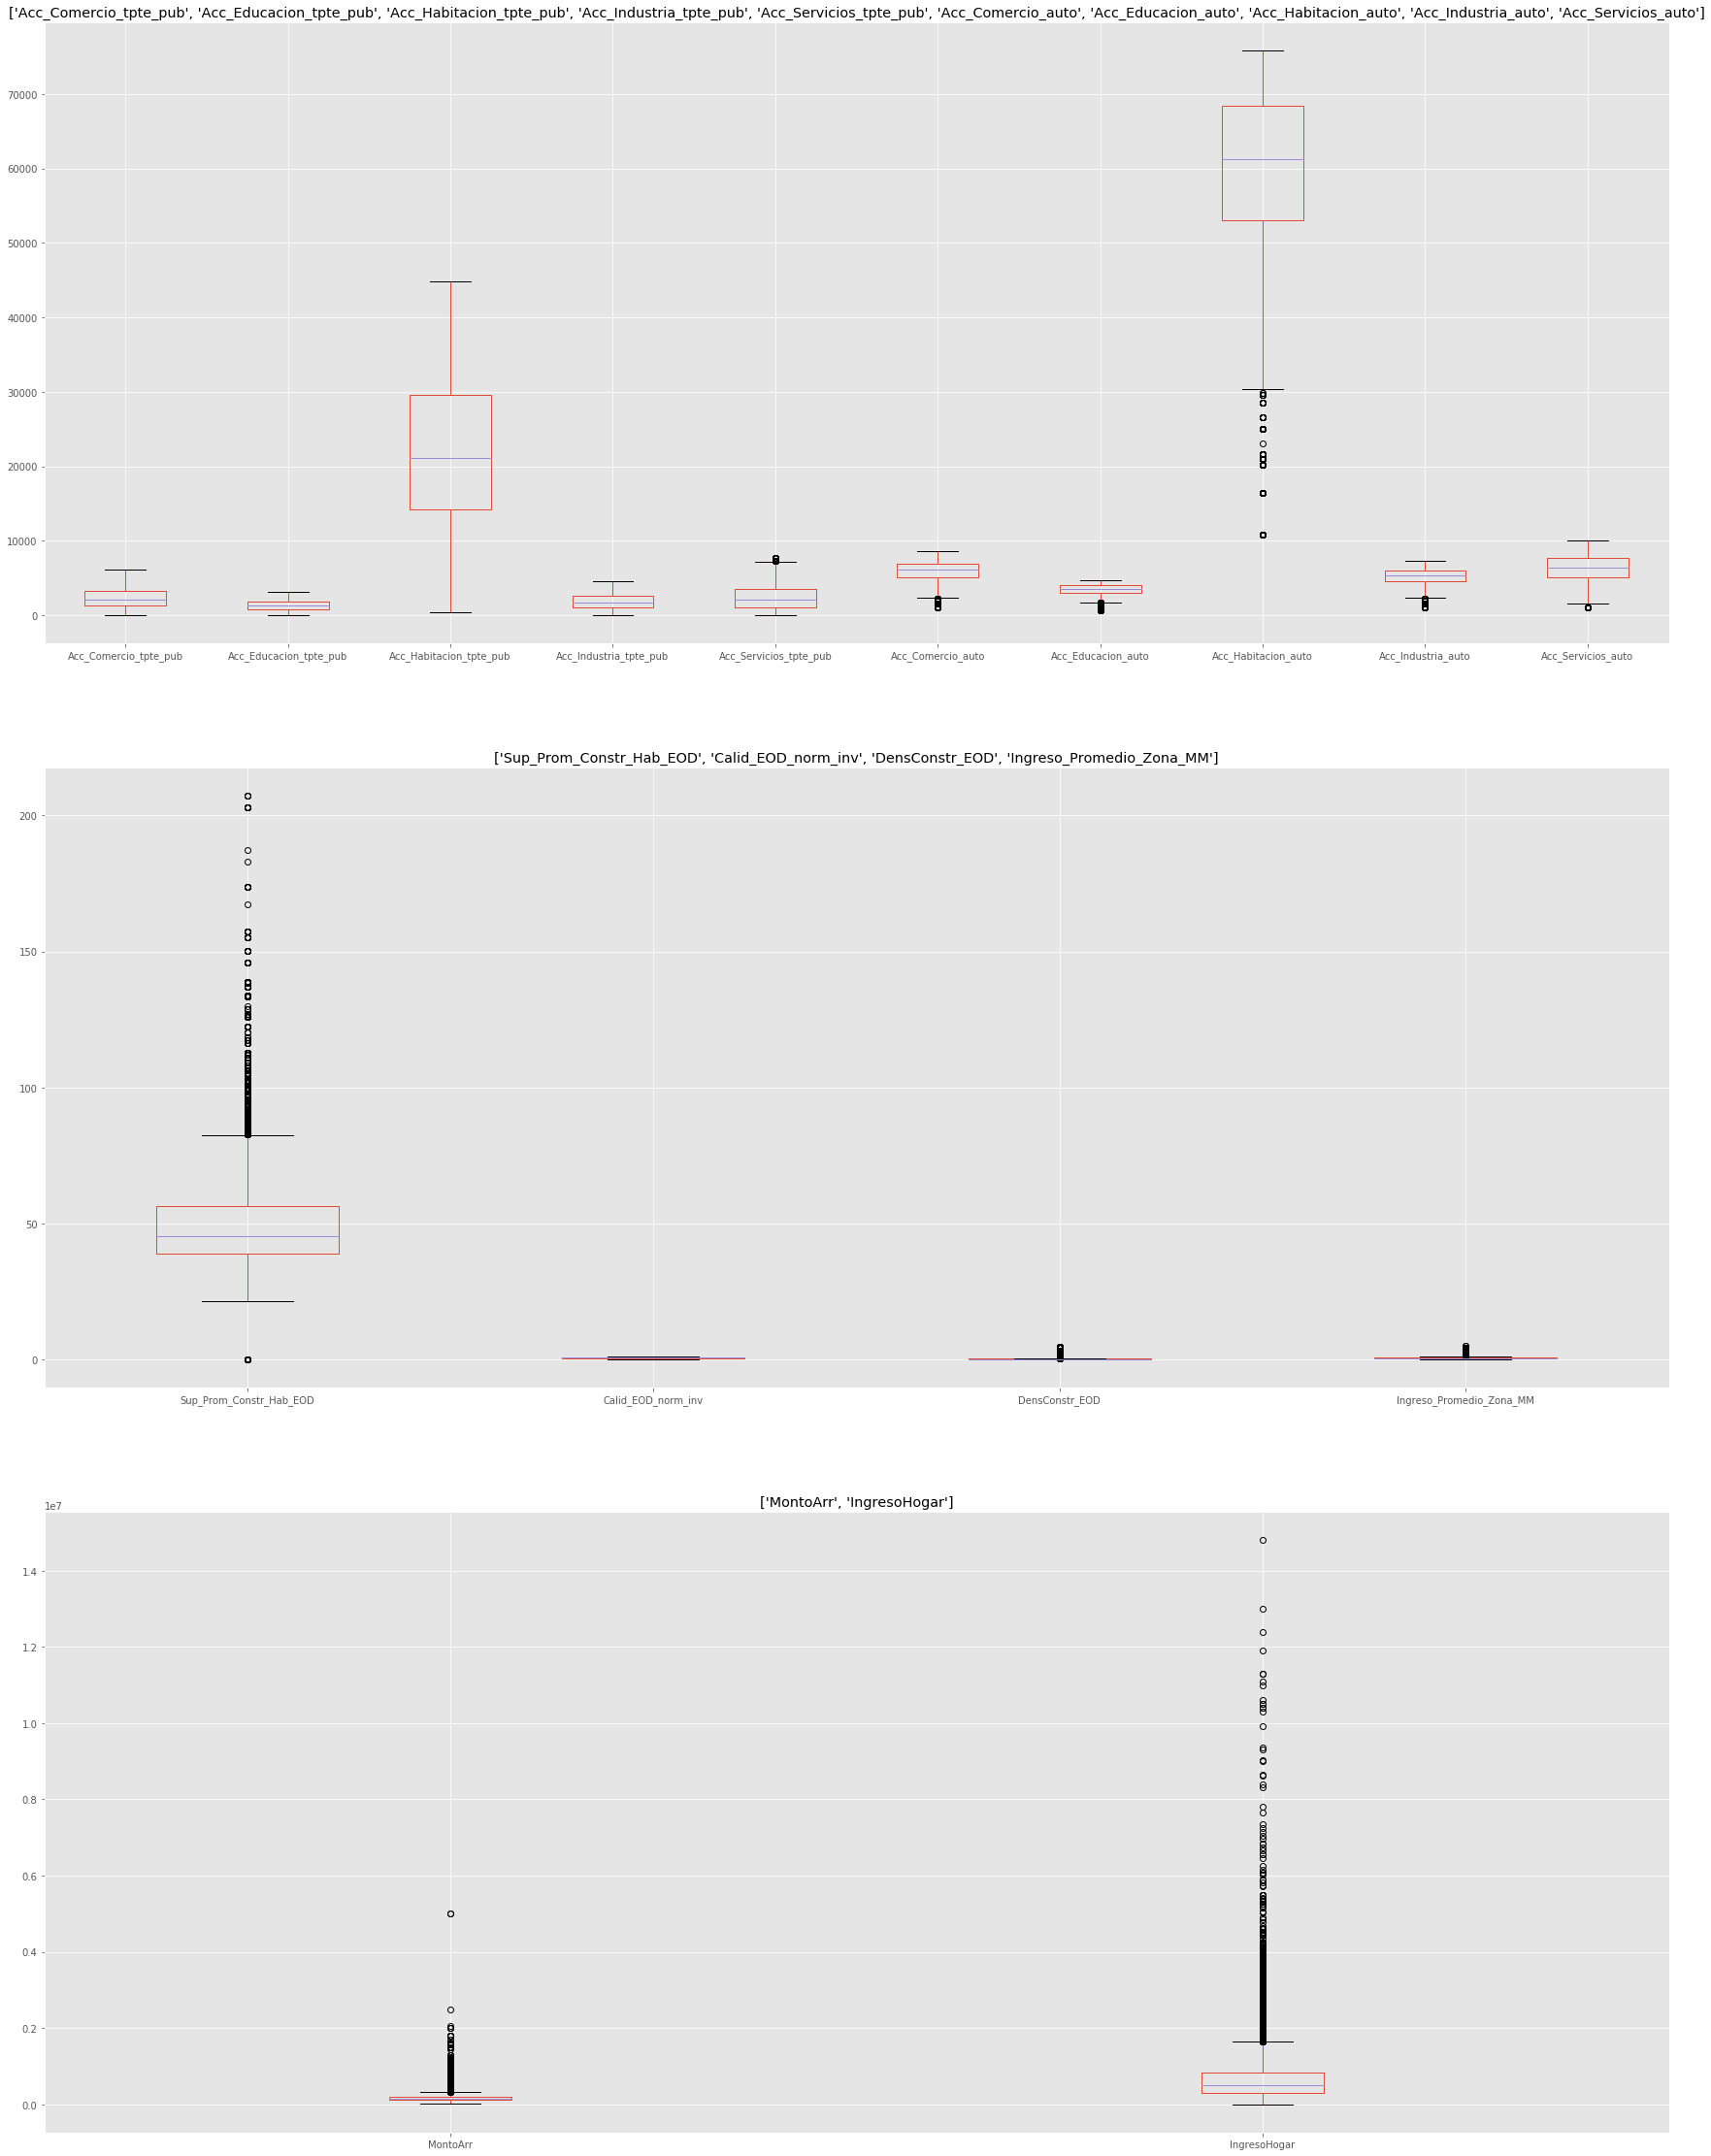

In [42]:
# Plot boxplots of columns
cols = [acc_cols, zone_cols, other_cols]
fig = plt.figure(figsize = (30,40))

for i in range(len(cols)): 
    plt.subplot(3,1,i+1)
    col = cols[i]
    ax = fig.gca()
    data_full[col].boxplot(ax=ax)
    plt.title(cols[i])
    
plt.show()

From the plots above it can be seen that there are indeed some outliers, but a lot of the attributes have a heavy tail, so perhaps not all of the black dots should be considered outliers. The columns where outliers will be removed are **Acc_Habitacion_auto** and **MontoArr** since those columns have very clear outliers that lie far away from the other datapoints.

In order to decide which outliers should be removed the **scipty** package was used to include the **stats**. The function **zscore** was used to calculate the z score for all of the datapoints for the two chosen attributes. The z-score indicates the number of standard deviations that the observations deviates from the mean. Then the threshold was defined as 3, and all observations that lie within that threshold were added to a new dataframe that contains the full data without the outliers. After this data cleanup the dataset contains 17.100 observations after 730 observations where removed from the dataset.

In [43]:
#all columns with outliers according to box plot
#outlier_cols = ['Acc_Servicios_tpte_pub', 'Acc_Comercio_auto', 'Acc_Educacion_auto' , 'Acc_Industria_auto',
#               'Acc_Servicios_auto','Acc_Habitacion_auto',
#                'Sup_Prom_Constr_Hab_EOD',
# 'DensConstr_EOD',
# 'Ingreso_Promedio_Zona_MM', 'MontoArr', 'IngresoHogar']

#all columns with dramatic outliers according to Petra
outlier_cols = ['Acc_Habitacion_auto', 'MontoArr']

In [44]:
from scipy import stats
import numpy as np
# Compute the z-score and define a threshold
z = np.abs(stats.zscore(data_full[outlier_cols]))
threshold = 3

In [45]:
# Extract the data without outliers
data_full_o = data_full[(z < threshold).all(axis=1)]

In [46]:
# Print info
print('Data with outliers: ', len(data_full))
print('Data without outliers: ', len(data_full_o))

Data with outliers:  17830
Data without outliers:  17100


In [47]:
# Override the data_full with the dataset with the outliers removed
data_full = data_full_o

### Correlations
In the next step the correlations between the remaining (not excluded) features are examined, in order to finally determine which features could be used for the macine learning models. Since the training and test sets differ significantly from each other, the correlations where computed using both datasets combined. To gain better insights and have a clearer visualization the correlation matrix was colored with a cool/warm gradient.

In [48]:
# Defining the remaining feature columns (target variable included)
feature_cols = ['Sector', 'MontoArr', 'IngresoHogar', 'Sup_Prom_Constr_Hab_EOD', 'Calid_EOD_norm_inv',
                'DensConstr_EOD', 'Dist_est_Metro_MC_KM','Dist_salida_Autop_MC_KM','Tiempo_Com_Stgo',
                'Ingreso_Promedio_Zona_MM', 'Acc_Comercio_tpte_pub','Acc_Educacion_tpte_pub',
                'Acc_Habitacion_tpte_pub','Acc_Industria_tpte_pub', 'Acc_Servicios_tpte_pub','Acc_Comercio_auto',
                'Acc_Educacion_auto','Acc_Habitacion_auto','Acc_Industria_auto','Acc_Servicios_auto', 'CLASE']

# The full data set is used to examine the correlations as train and test set differ significantly from each other.
correlation = data_full[feature_cols].corr()

# To gain better insights we use a colored version of the matrix
correlation.style.background_gradient(cmap='coolwarm', axis=None)

,Sector,MontoArr,IngresoHogar,Sup_Prom_Constr_Hab_EOD,Calid_EOD_norm_inv,DensConstr_EOD,Dist_est_Metro_MC_KM,Dist_salida_Autop_MC_KM,Tiempo_Com_Stgo,Ingreso_Promedio_Zona_MM,Acc_Comercio_tpte_pub,Acc_Educacion_tpte_pub,Acc_Habitacion_tpte_pub,Acc_Industria_tpte_pub,Acc_Servicios_tpte_pub,Acc_Comercio_auto,Acc_Educacion_auto,Acc_Habitacion_auto,Acc_Industria_auto,Acc_Servicios_auto,CLASE
Sector,1,-0.10958,-0.0330128,-0.151108,-0.154045,-0.0851344,0.129652,0.236667,0.297076,-0.0739948,-0.15093,-0.0476409,-0.0462309,-0.331837,-0.224345,-0.346085,-0.240539,-0.252849,-0.423175,-0.462358,-0.0577526
MontoArr,-0.10958,1,0.46822,0.582395,-0.563736,0.327861,-0.176836,-0.019984,-0.249134,0.681584,0.288515,0.23381,0.288024,0.0557728,0.340358,0.264185,0.212367,0.237191,0.0571166,0.320112,0.499792
IngresoHogar,-0.0330128,0.46822,1,0.286596,-0.2856,0.13707,-0.0668034,0.0433264,-0.102754,0.46712,0.0996165,0.0808459,0.10629,-0.0148253,0.120859,0.101029,0.081187,0.0921473,-0.00215864,0.12553,0.371414
Sup_Prom_Constr_Hab_EOD,-0.151108,0.582395,0.286596,1,-0.500094,0.27943,-0.311236,-0.117421,-0.320077,0.613232,0.361024,0.323479,0.362087,0.209594,0.396298,0.363507,0.320043,0.333506,0.191039,0.408185,0.348738
Calid_EOD_norm_inv,-0.154045,-0.563736,-0.2856,-0.500094,1,-0.338803,0.34734,-0.0673134,0.204326,-0.596938,-0.309822,-0.291057,-0.386668,0.0543052,-0.332952,-0.231084,-0.230126,-0.266262,0.0584214,-0.237708,-0.360983
DensConstr_EOD,-0.0851344,0.327861,0.13707,0.27943,-0.338803,1,-0.326402,-0.252896,-0.530053,0.266615,0.668912,0.610638,0.584749,0.497627,0.718186,0.565794,0.508503,0.478744,0.408753,0.612931,0.291812
Dist_est_Metro_MC_KM,0.129652,-0.176836,-0.0668034,-0.311236,0.34734,-0.326402,1,0.318476,0.482112,-0.13076,-0.614224,-0.660316,-0.718679,-0.568241,-0.545106,-0.751038,-0.812208,-0.840669,-0.702367,-0.650806,-0.127895
Dist_salida_Autop_MC_KM,0.236667,-0.019984,0.0433264,-0.117421,-0.0673134,-0.252896,0.318476,1,0.314642,0.0897934,-0.390756,-0.377518,-0.373473,-0.484583,-0.383472,-0.501637,-0.478996,-0.478019,-0.53602,-0.501781,0.000507034
Tiempo_Com_Stgo,0.297076,-0.249134,-0.102754,-0.320077,0.204326,-0.530053,0.482112,0.314642,1,-0.201425,-0.72648,-0.683319,-0.665349,-0.697962,-0.718754,-0.708827,-0.656282,-0.629996,-0.626204,-0.731344,-0.210043
Ingreso_Promedio_Zona_MM,-0.0739948,0.681584,0.46712,0.613232,-0.596938,0.266615,-0.13076,0.0897934,-0.201425,1,0.192303,0.150146,0.20361,-0.0487388,0.237768,0.197529,0.153025,0.176977,-0.0219501,0.25179,0.444649


Based on the correlation matrix above the attributes were grouped into two groups, the "financial value" group and the "accessibility" group:

#### Correlations within the "financial value" group
- "MontoArr" and "Ingreso_Promedio_Zona_MM" (0,66)
- "Sup_Prom_Constr_Hab_EOD" and "Ingreso_Promedio_Zona_MM" (-0,63)
- "Calid_EOD_norm_inv" and "Ingreso_Promedio_Zona_MM" (-0,60)
- "MontoArr" and "Sup_Prom_Constr_Hab_EOD" (0,54)
- "Calid_EOD_norm_inv" and "Sup_Prom_Constr_Hab_EOD" (-0,54)
- "Ingreso Hogar" and "Ingreso_Promedio_Zona_MM" (0,53)
- "MontoArr" and "Calid_EOD_norm_inv" (-0,50)
- "MontoArr" and IngresoHogar (0,49)  


#### Correlations within "accessibility" group
- "Accessibility" features theirselves (0,64 to 0,99)
- "Tiempo_Com_Stgo" and the "Accessibility" features (-0,69 to -0,77)
- "Dist_est_Metro_MC_KM" and all the "Accessibility"  features ( -0,52 to -0,86)
- "DensConstr_EOD" and the "Accessibility" features (0,41 to 0,72)
- "Dist_est_Metro_MC_KM" and "Tiempo_Com_Stgo" (0,61)
- "DensConstr_EOD" and "Tiempo_Com_Stgo" (-0,52)
- "Sup_Prom_Constr_Hab_EOD" and "Dist_est_Metro_MC_KM" (-0,43)
- "Sup_Prom_Constr_Hab_EOD" and "Tiempo_Com_Stgo" (-0,40)

Next the average correlation between a feature and all other features of the dataset are explored. Both for all the features in the dataset and the average correlation within the finance features and the accessibility features.

In [49]:
# sorting features by their correlation with other features (ALL FEATURES)
feature_cols.remove('CLASE')
correlation_all = data_full[feature_cols].corr()
correlation_all = correlation_all.abs()
correlation_all['Avg_Corr'] = correlation_all.mean()
correlation_all = correlation_all.sort_values(by='Avg_Corr', ascending=False)
correlation_all = correlation_all.drop(columns=feature_cols)
correlation_all

,Avg_Corr
Acc_Servicios_auto,0.644685
Acc_Comercio_auto,0.643895
Acc_Comercio_tpte_pub,0.621872
Acc_Educacion_auto,0.619921
Acc_Servicios_tpte_pub,0.616654
Acc_Habitacion_auto,0.616383
Acc_Habitacion_tpte_pub,0.612574
Acc_Educacion_tpte_pub,0.602033
Acc_Industria_tpte_pub,0.568175
Acc_Industria_auto,0.558721


In [50]:
#sorting features by their correlation with other features (ONLY ACCESSIBILITY FEATURES)
accessibility_cols = ['DensConstr_EOD', 'Dist_est_Metro_MC_KM','Tiempo_Com_Stgo','Acc_Comercio_tpte_pub',
                      'Acc_Educacion_tpte_pub','Acc_Habitacion_tpte_pub','Acc_Industria_tpte_pub',
                      'Acc_Servicios_tpte_pub','Acc_Comercio_auto','Acc_Educacion_auto','Acc_Habitacion_auto',
                      'Acc_Industria_auto','Acc_Servicios_auto']
correlation_acc = data_full[accessibility_cols].corr()
correlation_acc = correlation_acc.abs()
correlation_acc['Avg_Corr'] = correlation_acc.mean()
correlation_acc = correlation_acc.sort_values(by='Avg_Corr', ascending=False)
correlation_acc = correlation_acc.drop(columns=accessibility_cols)
correlation_acc

,Avg_Corr
Acc_Comercio_auto,0.836373
Acc_Educacion_auto,0.821702
Acc_Comercio_tpte_pub,0.818805
Acc_Servicios_auto,0.814326
Acc_Educacion_tpte_pub,0.810473
Acc_Habitacion_auto,0.806977
Acc_Habitacion_tpte_pub,0.806546
Acc_Servicios_tpte_pub,0.792079
Acc_Industria_tpte_pub,0.781834
Acc_Industria_auto,0.760349


In [51]:
# sorting features by their correlation with other features (ONLY FINANCE FEATURES)
finance_cols = ['MontoArr','IngresoHogar','Sup_Prom_Constr_Hab_EOD','Calid_EOD_norm_inv','Ingreso_Promedio_Zona_MM']
correlation_fin = data_full[finance_cols].corr()
correlation_fin = correlation_fin.abs()
correlation_fin['Avg_Corr'] = correlation_fin.mean()
correlation_fin = correlation_fin.sort_values(by='Avg_Corr', ascending=False)
correlation_fin = correlation_fin.drop(columns=finance_cols)
correlation_fin

,Avg_Corr
Ingreso_Promedio_Zona_MM,0.671775
MontoArr,0.659187
Sup_Prom_Constr_Hab_EOD,0.596463
Calid_EOD_norm_inv,0.589274
IngresoHogar,0.501507


From the colored correlation matrix above several __assumptions/conclusions__ can be drawn, which are presented below. Additionally, considering that in a prediction model there is usually a high correlation between each feature variable and the target variable and a low correlation between the different feature variables, __decisions for the prediction model__ can be derived.


__Irrelevance:__

The features "Dist_salida_Autop_MC_KM" and "Sector" have almost no correlation with the target variable (correlation coefficient -0,02 and -0,08 respectively), yet correlate with the other input variables. Therefore, these two features will not be considered when building the model.

__Accessibility:__  

Examining the correlation matrix, a high correlation among the following features, describing the "accessibility" associated with a property, can be discovered (see also modified correlation matrix below):
- the "Accessibility" features (10 in total)
- Tiempo_Com Stgo
- Dist_est_Metro_MC_KM
- DensConstr_EOD

The correlation between the first three can be explained easily. The shorter the distance to the nearest subway station, the faster certain points of interest such as habitational, industrial or commercial areas can be reached. Moreover, the accessibility of these areas is connected to the time it takes to get to the CBD as these areas are normally located close to the center of a city, this will be further examined in the **Exploratory notebook**. This is also an explanation for why "DensConstr_EOD" is correlated with these features: Generally, the built density decreases with increasing distance to the center of a city.  

##### *Before being introduced to Principal Component Analysis (PCA)*

Due to these correlations it is proposed to reduce the amount of these features when building the model, as already a few of them can be used to assess the overall "accessibility" of a certain household's location. At this point of time, we __decide to eliminate very strong correlation among input variables__ (correlation coefficient > 0,85). From the correlation matrix below we can see that this is the case among all the "Acc_..._ pub" variables and among all the "Acc_..._ auto" variables (dark red cells). Therefore, it was  __decided to use only one feature from each of the two groups "Acc_..._ pub" and "Acc_..._ auto"__. Choosing the ones with the highest correlation to the target variable the features used will be "Acc_Servicios_tpte_pub" and "Acc_Servicios_auto" respectively.  

It is __clear that there still exist significant correlations between the reamining input variables__. This issue will be explored later when testing if changing the input variables can improve the prediction results.   
Moreover, as "Dist_est_Metro_MC_KM" has only a poor correlation to the target variable (-0,13) and as it can be represented by the other features within the "accessibility group" due to its high correlation to them, it was decided to not use it in the model

##### *After being introduced to Principal Component Analysis (PCA)*

Since the accessibility columns are highly correlated a Principal Component Analysis will be carried out to see if a lower dimensionality representation of the accessibility features can be extracted. This will be carried out in the **Predictive notebook**.


In [52]:
# correlation matrix of accessibility_cols
corr_accessibility = data_full[accessibility_cols].corr()
corr_accessibility.style.background_gradient(cmap='coolwarm', axis=None)

,DensConstr_EOD,Dist_est_Metro_MC_KM,Tiempo_Com_Stgo,Acc_Comercio_tpte_pub,Acc_Educacion_tpte_pub,Acc_Habitacion_tpte_pub,Acc_Industria_tpte_pub,Acc_Servicios_tpte_pub,Acc_Comercio_auto,Acc_Educacion_auto,Acc_Habitacion_auto,Acc_Industria_auto,Acc_Servicios_auto
DensConstr_EOD,1,-0.326402,-0.530053,0.668912,0.610638,0.584749,0.497627,0.718186,0.565794,0.508503,0.478744,0.408753,0.612931
Dist_est_Metro_MC_KM,-0.326402,1,0.482112,-0.614224,-0.660316,-0.718679,-0.568241,-0.545106,-0.751038,-0.812208,-0.840669,-0.702367,-0.650806
Tiempo_Com_Stgo,-0.530053,0.482112,1,-0.72648,-0.683319,-0.665349,-0.697962,-0.718754,-0.708827,-0.656282,-0.629996,-0.626204,-0.731344
Acc_Comercio_tpte_pub,0.668912,-0.614224,-0.72648,1,0.981354,0.961376,0.888645,0.981226,0.806975,0.777229,0.751165,0.683893,0.802989
Acc_Educacion_tpte_pub,0.610638,-0.660316,-0.683319,0.981354,1,0.983625,0.872035,0.935887,0.796744,0.797262,0.773672,0.681236,0.760066
Acc_Habitacion_tpte_pub,0.584749,-0.718679,-0.665349,0.961376,0.983625,1,0.821777,0.911979,0.800656,0.810555,0.802464,0.669827,0.754067
Acc_Industria_tpte_pub,0.497627,-0.568241,-0.697962,0.888645,0.872035,0.821777,1,0.851371,0.810214,0.778902,0.740378,0.83713,0.799559
Acc_Servicios_tpte_pub,0.718186,-0.545106,-0.718754,0.981226,0.935887,0.911979,0.851371,1,0.776404,0.721031,0.694803,0.63317,0.809116
Acc_Comercio_auto,0.565794,-0.751038,-0.708827,0.806975,0.796744,0.800656,0.810214,0.776404,1,0.982787,0.971811,0.928534,0.973063
Acc_Educacion_auto,0.508503,-0.812208,-0.656282,0.777229,0.797262,0.810555,0.778902,0.721031,0.982787,1,0.994127,0.927113,0.916131


__Financial value:__

Similiarly, the following five features, which somehow describe the financial value of a property, are correlated among each other (see also modified correlation matrix below):  
- "MontoArr"
- "IngresoHogar"
- "Ingreso_Promedio_Zona_MM"
- "Sup_Prom_Constr_Hab_EOD"
- "Calid_EOD_norm_inv"

This correlation also makes sense, as firstly the income of a household obviously has an influence on the average income of its zone. Secondly, the income of a household heavily determines the height of dwelling rate it can afford. Thirdly, the higher a property's construction quality the higher its financial value - and vice versa.  
The correlation of these features with the average built surface of residential units in the zone can be explained by the fact that the higher the demand for a habitational area, the higher the prices and the higher the density of habitational buildings in this area.

Like for the accessibility group, it was decided to __eliminate very strong correlation__ (correlation coefficient > 0,85) among input variables. __In this group there is no such very strong correlation__, consequently it was decided to __keep all the variables for now__. Again, it is clear that there exist significant correlations between the features within this group but regularization within the models will be used to decide which features are irrelevant.

In [53]:
# Financial features correlations
corr_finance = data_full[finance_cols].corr()
corr_finance.style.background_gradient(cmap='coolwarm', axis=None)

,MontoArr,IngresoHogar,Sup_Prom_Constr_Hab_EOD,Calid_EOD_norm_inv,Ingreso_Promedio_Zona_MM
MontoArr,1,0.46822,0.582395,-0.563736,0.681584
IngresoHogar,0.46822,1,0.286596,-0.2856,0.46712
Sup_Prom_Constr_Hab_EOD,0.582395,0.286596,1,-0.500094,0.613232
Calid_EOD_norm_inv,-0.563736,-0.2856,-0.500094,1,-0.596938
Ingreso_Promedio_Zona_MM,0.681584,0.46712,0.613232,-0.596938,1


Now, using only the proposed features, the following correlation matrix can be obtained. 

In [54]:
X_cols = ['MontoArr', 'IngresoHogar', 'Sup_Prom_Constr_Hab_EOD', 'Calid_EOD_norm_inv', 'DensConstr_EOD',
          'Tiempo_Com_Stgo', 'Ingreso_Promedio_Zona_MM', 'Acc_Servicios_tpte_pub','Acc_Servicios_auto']
Y_col = ['CLASE']
corr_model = data_full[X_cols].corr()
corr_model.style.background_gradient(cmap='coolwarm', axis=None)

,MontoArr,IngresoHogar,Sup_Prom_Constr_Hab_EOD,Calid_EOD_norm_inv,DensConstr_EOD,Tiempo_Com_Stgo,Ingreso_Promedio_Zona_MM,Acc_Servicios_tpte_pub,Acc_Servicios_auto
MontoArr,1,0.46822,0.582395,-0.563736,0.327861,-0.249134,0.681584,0.340358,0.320112
IngresoHogar,0.46822,1,0.286596,-0.2856,0.13707,-0.102754,0.46712,0.120859,0.12553
Sup_Prom_Constr_Hab_EOD,0.582395,0.286596,1,-0.500094,0.27943,-0.320077,0.613232,0.396298,0.408185
Calid_EOD_norm_inv,-0.563736,-0.2856,-0.500094,1,-0.338803,0.204326,-0.596938,-0.332952,-0.237708
DensConstr_EOD,0.327861,0.13707,0.27943,-0.338803,1,-0.530053,0.266615,0.718186,0.612931
Tiempo_Com_Stgo,-0.249134,-0.102754,-0.320077,0.204326,-0.530053,1,-0.201425,-0.718754,-0.731344
Ingreso_Promedio_Zona_MM,0.681584,0.46712,0.613232,-0.596938,0.266615,-0.201425,1,0.237768,0.25179
Acc_Servicios_tpte_pub,0.340358,0.120859,0.396298,-0.332952,0.718186,-0.718754,0.237768,1,0.809116
Acc_Servicios_auto,0.320112,0.12553,0.408185,-0.237708,0.612931,-0.731344,0.25179,0.809116,1
